In [ ]:
from sklearn.datasets import make_regression
import pandas as pd
import numpy as np
x,y=make_regression(n_features=5,n_samples=1000,random_state=0,n_informative=3)
y.shape,x.shape

((1000,), (1000, 5))

In [ ]:
y=y.reshape(1000,1)
data=np.concatenate((x,y),axis=1)
data[:5]

array([[-2.30695777e+00, -1.34170494e+00,  3.09703589e-01,
        -3.55083122e-01, -7.51568990e-01, -4.10218726e+01],
       [-8.01496885e-01,  2.71170185e-01, -5.25640593e-01,
        -8.87780137e-01,  9.36398544e-01,  3.10983585e+01],
       [-1.15579248e+00, -1.74292134e-01,  1.98672970e-01,
        -1.56303468e-01, -3.08802909e-01, -1.40234469e+01],
       [ 2.72110643e-01, -1.11852587e+00, -8.93545398e-01,
        -1.69240574e+00, -9.46220620e-01, -1.17875889e+02],
       [ 2.39145581e-01,  5.31042507e-01,  2.06690512e-01,
        -3.33192828e-02, -1.53080350e+00, -9.36377652e+01]])

In [ ]:
df=pd.DataFrame(data,columns=['f1','f2','f3','f4','f5','y'])
df.head()

,f1,f2,f3,f4,f5,y
0,-2.306958,-1.341705,0.309704,-0.355083,-0.751569,-41.021873
1,-0.801497,0.271170,-0.525641,-0.887780,0.936399,31.098358
2,-1.155792,-0.174292,0.198673,-0.156303,-0.308803,-14.023447
3,0.272111,-1.118526,-0.893545,-1.692406,-0.946221,-117.875889
4,0.239146,0.531043,0.206691,-0.033319,-1.530803,-93.637765


In [ ]:
df['f4'].mean(),df['f1'].mean(),df['f1'].var()

(-0.061764282876754076, -0.004203351300497999, 0.9777534213845124)

In [ ]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)
#st.fit_transform(df[df.columns[:-1]])
x[:3]

array([[-2.32996935, -1.31701976,  0.32827455, -0.29658226, -0.83812384],
       [-0.80671629,  0.2903965 , -0.50222054, -0.83520597,  0.96497831],
       [-1.1651991 , -0.15355813,  0.21788845, -0.09559101, -0.36515712]])

In [ ]:
data=np.concatenate((x,y),axis=1)
df=pd.DataFrame(data,columns=['f1','f2','f3','f4','f5','y'])
df.head()

,f1,f2,f3,f4,f5,y
0,-2.329969,-1.317020,0.328275,-0.296582,-0.838124,-41.021873
1,-0.806716,0.290396,-0.502221,-0.835206,0.964978,31.098358
2,-1.165199,-0.153558,0.217888,-0.095591,-0.365157,-14.023447
3,0.279580,-1.094596,-0.867990,-1.648784,-1.046052,-117.875889
4,0.246225,0.549389,0.225859,0.028761,-1.670509,-93.637765


In [ ]:
df['f4'].mean(),df['f1'].mean(),df['f1'].var()

(-5.329070518200751e-17, 9.75781955236954e-17, 1.0010010010010009)

array([[ 1.        ,  0.04429786, -0.01098139, -0.02674929,  0.00348529],
       [ 0.04429786,  1.        ,  0.00117087,  0.03742156,  0.00249665],
       [-0.01098139,  0.00117087,  1.        ,  0.0082137 , -0.04832869],
       [-0.02674929,  0.03742156,  0.0082137 ,  1.        ,  0.03212294],
       [ 0.00348529,  0.00249665, -0.04832869,  0.03212294,  1.        ]])

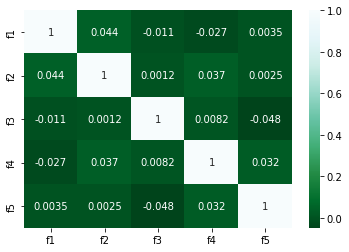

In [ ]:
import seaborn as sns
sns.heatmap(df[df.columns[:-1]].corr(),annot=True,cmap='BuGn_r')
arr=np.array(df[df.columns[:-1]].corr())
arr

In [ ]:
max_lst=[[df.columns[i],df.columns[np.where(arr[i]==sorted(arr[i],reverse=True)[1])],sorted(arr[i],reverse=True)[1]] for i in range(5)]
max_lst

[['f1', Index(['f2'], dtype='object'), 0.04429785703484758],
 ['f2', Index(['f1'], dtype='object'), 0.04429785703484758],
 ['f3', Index(['f4'], dtype='object'), 0.00821370416841243],
 ['f4', Index(['f2'], dtype='object'), 0.03742155878072816],
 ['f5', Index(['f4'], dtype='object'), 0.03212293569170375]]

In [ ]:
import statsmodels.api as sm
result = sm.OLS(y, x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.295e+06
Date:                Sun, 31 Oct 2021   Prob (F-statistic):                        0.00
Time:                        10:30:54   Log-Likelihood:                         -1049.3
No. Observations:                1000   AIC:                                      2109.
Df Residuals:                     995   BIC:                                      2133.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -1.454e-14      0.022  -6.63e-13      1.000      -0.043       0.043
x2          2.631e-14      0.022    1.2e-12      1.000      -0.043       0.043
x3            41.4465      0.022   1889.611      0.000      41.403      41.490
x4            10.5966      0.022    482.927      0.000      10.554      10.640
x5            62.2532      0.022   2836.990      0.000      62.210      62.296
==============================================================================
Omnibus:                        0.612   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.736   Jarque-Bera (JB):                0.698
Skew:                          -0.033   Prob(JB):                        0.705
Kurtosis:                       2.889   Cond. No.                         1.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
lr.coef_,lr.intercept_


(array([[-2.93217725e-15,  1.77635684e-15,  4.12059338e+01,
          1.07145318e+01,  6.64994824e+01]]), array([-6.43929354e-15]))

In [ ]:
lr.predict(np.array([x[1]])),y[1]

(array([[52.75786996]]), array([52.75786996]))

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
sgd=SGDRegressor(learning_rate='constant',eta0=0.001,random_state=9)
sgd.fit(x,y)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.001, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=9,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd.coef_,sgd.predict(np.array([x[1]]))

(array([ 4.84305713e-05,  8.53299950e-05, -4.92094366e-04,  1.07137423e+01,
         6.64915932e+01]), array([52.75169002]))

-2.8345545052747023 2.9290962417638613
-30.368686494700647 31.381582295702586


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


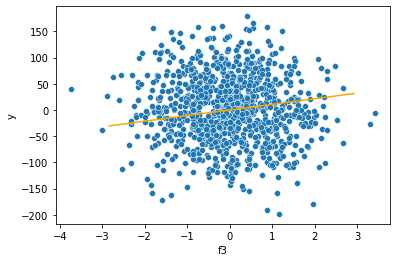

In [ ]:
import matplotlib.pyplot as plt

def draw_line(x1,y):
  x_min=df[x1].min();x_max=df[x1].max()
  print(x_min,x_max)
  y_min=sgd.coef_[3]*x_min;y_max=sgd.coef_[3]*x_max;print(y_min,y_max)
  yline=[y_min,y_max];xaxis=[x_min,x_max]
  return yline,xaxis
sns.scatterplot(df[df.columns[2]],df['y'])
regression_line,xaxis=draw_line(df.columns[3],y)
plt.plot(xaxis,regression_line,color='orange')
plt.show()